## Reto 04: Clasificar 8 categorías, con 3 samples en lugar de 2.
En este reto hay que clasificar 8 categorías. Utilizaré el mismo esquema que el de 4, pero deberás notar los cambios que he hecho tanto en la generación de blobs, como en la estructura neuronal.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

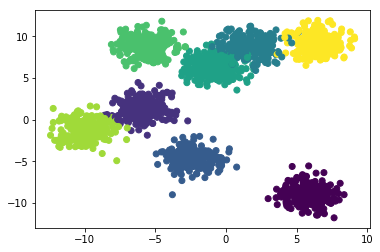

In [5]:
x, y = make_blobs(n_samples=2000, centers=8, n_features=3)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

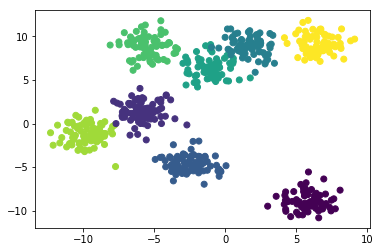

In [6]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.30)
plt.scatter(x_prueba[:,0], x_prueba[:,1], c=y_prueba)

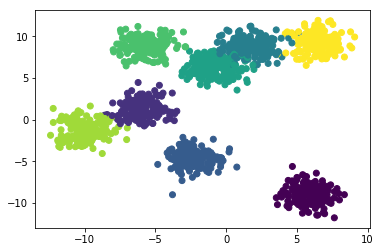

In [7]:
plt.scatter(x_entrenamiento[:,0], x_entrenamiento[:,1], c=y_entrenamiento)

In [8]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(activation = 'logistic',solver='adam', alpha=1e-4, max_iter=10000, 
                           hidden_layer_sizes=(32,16,8))
classifier.fit(x_entrenamiento, y_entrenamiento)  

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
resultados = classifier.predict(x_prueba)
errores = np.sum(np.abs(resultados - y_prueba))
accuracy = (len(y_prueba)-errores)/len(y_prueba) *100
print("Errores cometidos: "+str(errores))
print("Precisión: "+str(accuracy)+"%")

Errores cometidos: 8
Precisión: 98.66666666666667%


In [10]:
print("Clases esperadas:")
print(y_prueba)
print("Resultados obtenidos:")
print(resultados)
print("Desfase:")
print(y_prueba-resultados)

Clases esperadas:
[4 3 7 7 4 1 3 1 5 2 0 1 6 7 4 0 1 2 5 7 7 1 7 0 1 5 0 7 3 6 2 6 6 5 2 2 7
 7 7 1 3 3 7 3 4 7 6 5 1 2 0 0 5 1 1 5 3 7 4 4 1 4 5 1 1 3 7 7 6 5 2 1 7 7
 1 7 6 2 6 0 7 4 5 3 7 4 5 2 1 5 5 3 4 5 6 6 7 6 7 4 4 3 2 5 7 2 5 2 0 7 4
 3 1 4 4 4 1 3 1 3 6 7 4 7 0 6 2 0 1 2 6 1 0 4 7 2 6 1 6 0 2 2 1 4 0 0 7 1
 5 7 7 1 2 7 2 1 2 1 7 1 6 6 6 6 4 3 6 0 6 5 1 2 1 1 2 3 2 2 0 2 7 7 0 6 5
 0 7 3 3 3 6 3 2 0 3 5 0 2 4 3 1 4 3 0 6 0 3 2 1 7 0 4 7 2 0 0 6 0 6 4 0 6
 6 5 0 7 6 0 5 2 1 4 1 3 4 0 5 2 3 1 4 1 6 2 4 7 3 1 6 0 1 2 1 3 1 3 5 7 5
 5 7 5 0 4 5 6 2 5 0 5 6 5 4 0 7 6 0 6 5 4 1 5 6 1 5 4 2 4 4 3 5 1 7 1 1 7
 1 2 7 2 1 0 3 0 7 6 5 0 7 4 5 7 6 4 2 1 1 6 5 2 0 3 2 4 5 6 0 2 1 0 5 2 6
 0 3 3 2 0 4 5 6 6 4 4 6 3 3 1 2 0 2 2 7 0 1 6 1 4 5 4 6 2 3 2 2 6 1 1 2 6
 6 1 7 6 0 1 3 1 3 7 3 1 5 2 6 6 7 5 3 4 2 4 3 5 2 3 2 2 1 0 1 7 7 0 4 0 0
 0 3 2 2 2 5 5 4 4 2 4 0 5 0 4 7 6 4 0 4 6 3 3 3 7 1 3 3 0 5 2 2 0 2 3 0 6
 5 3 6 3 0 2 2 4 3 7 6 7 6 6 7 3 3 4 4 7 0 6 3 6 7 3 3 2 5 6 3 2 5 4 4 3 5
 6 6 4 